In [75]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [76]:
# read data
df=pd.read_csv("./dummy dataset/localhost_1_pcap_Flow.csv")

In [77]:
#display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### display information about data

In [78]:
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,127.128.127.0-0.1.127.0-0-0-0,127.128.127.0,0,0.1.127.0,0,0,21/07/2020 02:27:17 PM,294,2,0,0,0,0,0,0,0,0,0,0,0,0,6802.721088,294.0,0.000000e+00,294,294,294,294.0,0.000000e+00,294,294,0,0,0,0,0,0,0,0,0,0,0,6802.721088,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,NeedManualLabel
1,202.164.127.0-0.1.127.0-0-0-0,202.164.127.0,0,0.1.127.0,0,0,21/07/2020 03:15:28 PM,8993,2,0,0,0,0,0,0,0,0,0,0,0,0,222.395196,8993.0,0.000000e+00,8993,8993,8993,8993.0,0.000000e+00,8993,8993,0,0,0,0,0,0,0,0,0,0,0,222.395196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,NeedManualLabel
2,60.206.127.0-0.1.127.0-0-0-0,60.206.127.0,0,0.1.127.0,0,0,21/07/2020 03:38:21 PM,88320782,3,0,0,0,0,0,0,0,0,0,0,0,0,0.033967,44160391.0,6.243523e+07,88308769,12013,88320782,44160391.0,6.243523e+07,88308769,12013,0,0,0,0,0,0,0,0,0,0,0,0.033967,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7.976640e+14,1.128067e+15,1.595328e+15,88308769.0,NeedManualLabel
3,127.139.127.0-0.1.127.0-0-0-0,127.139.127.0,0,0.1.127.0,0,0,21/07/2020 02:27:17 PM,366,2,0,0,0,0,0,0,0,0,0,0,0,0,5464.480874,366.0,0.000000e+00,366,366,366,366.0,0.000000e+00,366,366,0,0,0,0,0,0,0,0,0,0,0,5464.480874,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,NeedManualLabel
4,56.248.127.0-0.53.127.0-0-0-0,56.248.127.0,0,0.53.127.0,0,0,21/07/2020 02:27:17 PM,262,2,0,0,0,0,0,0,0,0,0,0,0,0,7633.587786,262.0,0.000000e+00,262,262,262,262.0,0.000000e+00,262,262,0,0,0,0,0,0,0,0,0,0,0,7633.587786,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,NeedManualLabel


In [79]:
df.groupby('Label').first()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NeedManualLabel,127.128.127.0-0.1.127.0-0-0-0,127.128.127.0,0,0.1.127.0,0,0,21/07/2020 02:27:17 PM,294,2,0,0,0,0,0,0,0,0,0,0,0,0,6802.721088,294.0,0.0,294,294,294,294.0,0.0,294,294,0,0,0,0,0,0,0,0,0,0,0,6802.721088,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 84 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Flow ID                     91 non-null     object 
 1   Src IP                      91 non-null     object 
 2   Src Port                    91 non-null     int64  
 3   Dst IP                      91 non-null     object 
 4   Dst Port                    91 non-null     int64  
 5   Protocol                    91 non-null     int64  
 6   Timestamp                   91 non-null     object 
 7   Flow Duration               91 non-null     int64  
 8   Total Fwd Packet            91 non-null     int64  
 9   Total Bwd packets           91 non-null     int64  
 10  Total Length of Fwd Packet  91 non-null     int64  
 11  Total Length of Bwd Packet  91 non-null     int64  
 12  Fwd Packet Length Max       91 non-null     int64  
 13  Fwd Packet Length Min       91 non-nu

In [81]:
df.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

### Preprocessing

In [82]:
def filter_ip(df):
    
    """ Method for filtering data based on ips of localhost traffic
    
    Args:
        df (dataframe)
        
    Attributes:
        df(dataframe) : complete data
        df_0(dataframe): where dst ip is 0.0.0.0 
        df_127(datafrae) : where dst ip is 0.1.127.0
    
    Returns:
        df(dataframe): where 0.0.0.0 or 0.1.127.0 is dst ip
        
    """
    
    df_0 = df.loc[df['Dst IP'] == "0.0.0.0"] 
    df_127 = df.loc[df['Dst IP'] == "0.1.127.0"]
    df = pd.concat([df_0, df_127])
    
    return df

In [83]:
# df = filter_ip(df)

In [84]:
# df.head()

In [85]:
# df.tail()

In [86]:
def select_features(df,features):
    
    """ Method for selecting columns with specific features only
    
    Args:
        df (dataframe)
        features (list): list of features to be selected     
    
    Returns:
        df(dataframe): with only columns mentioned in features list
        
    """
    
    df = df[features]
    
    return df

In [87]:
# df = select_features(df,features)

In [88]:
# df.head()

In [89]:
def normalize_data(df):
    
    """ Method for normalizing data using zscore
    
    Args:
        df (dataframe)
        
    Attributes:
        df (dataframe): original dataframe with selected rows and columns
        X (dataframe): consists of copy of df for processing
    
    Returns:
        X(dataframe): Normalized dataframe
        
    """
    
    X = df
    for col in X:
        X[col] = stats.zscore(X[col])
        
    return X

In [90]:
# df = normalize_data(df)

In [91]:
# df.head()

### DBSCAN Implementation

In [92]:
# Not using this function currently
def dbscan(X, eps, min_samples):
    
    """ Method for applying DBSCAN algorithm and plotting it
    
    Args:
        X (dataframe): preprocessed dataframe
        eps (float): The maximum distance between two samples for one to be 
                    considered as in the neighborhood of the other
        min_samples (int):The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
                        This includes the point itself
        
    Attributes:
        ss (object): standardscaler object
        X (dataframe): consists of copy of df for processing
        db (object): DBSCAN bject initialized
        y_pred (results): results predicted by DBSCAN object
    
    Returns: None
        
    """    
    
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

### outlier detection using DBSCAN

In [101]:
def outlier_detection_dbscan(eps, min_samples, X):
    
    """ Method for detecting multiple clusters, outliers and plotting them.
    
    Args:
        eps (float): The maximum distance between two samples for one to be 
                    considered as in the neighborhood of the other
        min_samples (int):The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
                        This includes the point itself
        X (dataframe): preprocessed datframe
        
    Attributes:
        ss (object): standardscaler object
        X (dataframe): consists of copy of df for processing
        db (object): DBSCAN bject initialized
        y_pred (results): results predicted by DBSCAN object
        cluster_0 (data points): consists of points in cluster 0
        cluster_1 (data points): consists of points in cluster 1
        cluster_2 (data points): consists of points in cluster 2
        cluster_3 (data points): consists of points in cluster 3
        cluster_4 (data points): consists of points in cluster 4
        cluster_5 (data points): consists of points in cluster 5
        outlier (data points): consists of points detected as outliers
    
    Returns: None
        
    """ 
    
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    
    cluster_0 = []
    cluster_1 = []
    cluster_2 = []
    cluster_3 = []
    cluster_4 = []
    cluster_5 = []
    outliers = []
    for i in range(len(X)):
        if db.labels_[i] == -1:
            outliers.append(X[i])
        elif db.labels_[i] == 0:
            cluster_0.append(X[i])
        elif db.labels_[i] == 1:
            cluster_1.append(X[i])
        elif db.labels_[i] == 2:
            cluster_2.append(X[i])
        elif db.labels_[i] == 3:
            cluster_3.append(X[i])
        elif db.labels_[i] == 4:
            cluster_4.append(X[i])
        elif db.labels_[i] == 5:
            cluster_5.append(X[i])
            
    if len(cluster_0) > 0:
        x_0 = []
        y_0 = []
        for i in range(len(cluster_0)):
            x_0.append(cluster_0[i][0])
            y_0.append(cluster_0[i][1])
        plt.scatter(x_0, y_0,c='b', cmap='Paired')
        print("Length of cluster 0 : ", len(cluster_0))

        
    if len(cluster_1) > 0:
        x_1 = []
        y_1 = []
        for i in range(len(cluster_1)):
            x_1.append(cluster_1[i][0])
            y_1.append(cluster_1[i][1])
        plt.scatter(x_1, y_1,c='g', cmap='Paired')
        print("Length of cluster 1 : ", len(cluster_1))

    
    if len(cluster_2) > 0:
        x_2 = []
        y_2 = []
        for i in range(len(cluster_2)):
            x_2.append(cluster_2[i][0])
            y_2.append(cluster_2[i][1])
        plt.scatter(x_2, y_2,c='y', cmap='Paired')
        print("Length of cluster 2 : ", len(cluster_2))

            
    if len(cluster_3) >0:
        x_3 = []
        y_3 = []
        for i in range(len(cluster_3)):
            x_3.append(cluster_3[i][0])
            y_3.append(cluster_3[i][1])
        plt.scatter(x_3, y_3,c='b', marker = "1" ,cmap='Paired')
        print("Length of cluster 3 : ", len(cluster_3))

            
    if len(cluster_4) > 0:
        x_4 = []
        y_4 = []
        for i in range(len(cluster_4)):
            x_4.append(cluster_4[i][0])
            y_4.append(cluster_4[i][1])
        plt.scatter(x_4, y_4,c='b',marker = "2", cmap='Paired')
        print("Length of cluster 4 : ", len(cluster_4))

            
    if len(cluster_5) > 0:
        x_5 = []
        y_5 = []
        for i in range(len(cluster_5)):
            x_5.append(cluster_5[i][0])
            y_5.append(cluster_5[i][1])
        plt.scatter(x_5, y_5,c='b',marker = "3", cmap='Paired')
        print("Length of cluster 5 : ", len(cluster_5))

            
    if len(outliers) > 0:    
        # outliers
        x = []
        y = []
        for i in range(len(outliers)):
            x.append(outliers[i][0])
            y.append(outliers[i][1])
        plt.scatter(x, y,c='r', marker = '*', cmap='Paired') #outlier
        print("Number of outliers : ", len(outliers))


In [102]:
def dbscan_workflow(df, features, epsilon, min_samples):
    
    """ Method implementing the whole pipleline of work work dbscan
    
    Args:
        df (dataframe): unprocessed data
        epsilon (float): The maximum distance between two samples for one to be 
                    considered as in the neighborhood of the other
        min_samples (int):The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
                        This includes the point itself
        features (list): names of features needed
        
    Returns: None
        
    """ 
    
    df = filter_ip(df)
    df = select_features(df,features)
    df = normalize_data(df)
    outlier_detection_dbscan(epsilon, min_samples, df)
    

### Various Configurations for DBSCAN outlier detection

#### Features:
Flow Duration , Total Fwd Packet

In [103]:
features = ['Flow Duration', 'Total Fwd Packet']

Length of cluster 0 :  28
Length of cluster 1 :  30
Number of outliers :  21


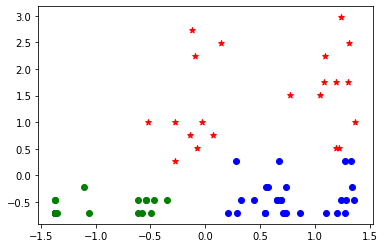

In [104]:
dbscan_workflow(df, features, 0.6, 10)

Length of cluster 0 :  69
Number of outliers :  10


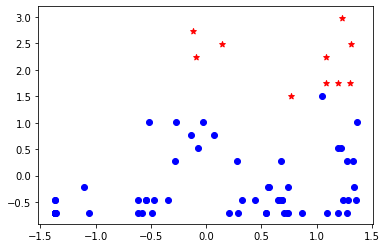

In [105]:
dbscan_workflow(df, features, 1, 15)

Length of cluster 0 :  67
Number of outliers :  12


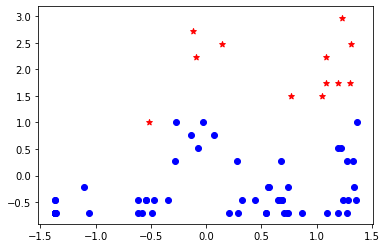

In [106]:
dbscan_workflow(df, features, 1, 20)

Length of cluster 0 :  73
Number of outliers :  6


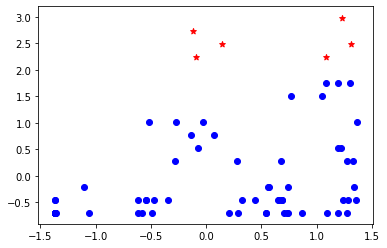

In [107]:
dbscan_workflow(df, features, 1.3, 20)

#### Features:
Flow Duration , Total Fwd Packet, Fwd Packets/s

In [108]:
features = ['Flow Duration', 'Total Fwd Packet', 'Fwd Packets/s']

Length of cluster 0 :  28
Length of cluster 1 :  24
Number of outliers :  27


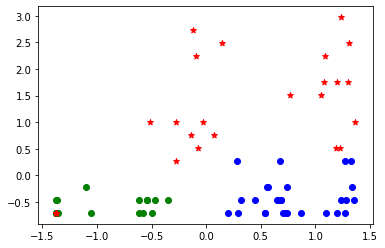

In [109]:
dbscan_workflow(df, features, 0.6, 10)

Length of cluster 0 :  23
Length of cluster 1 :  22
Number of outliers :  34


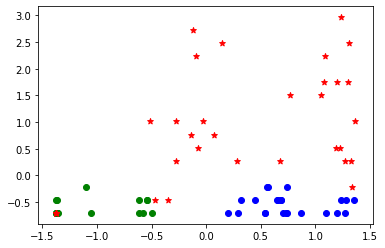

In [110]:
dbscan_workflow(df, features, 0.6, 20)

Length of cluster 0 :  63
Number of outliers :  16


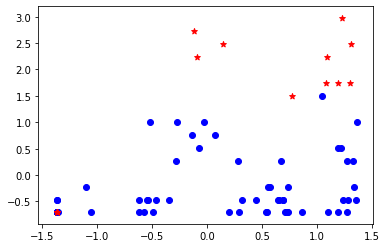

In [111]:
dbscan_workflow(df, features, 1, 15)

Length of cluster 0 :  67
Number of outliers :  12


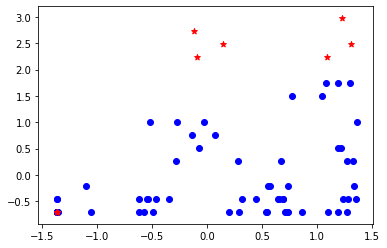

In [112]:
dbscan_workflow(df, features, 1, 10)

Length of cluster 0 :  71
Length of cluster 1 :  5
Number of outliers :  3


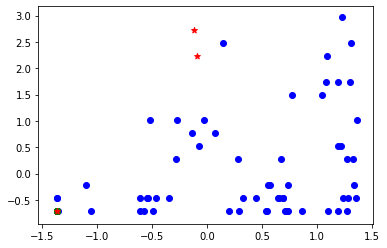

In [113]:
dbscan_workflow(df, features, 1, 5)

Length of cluster 0 :  61
Number of outliers :  18


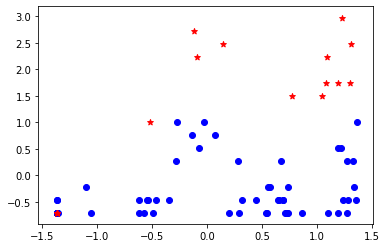

In [114]:
dbscan_workflow(df, features, 1, 20)

Length of cluster 0 :  67
Number of outliers :  12


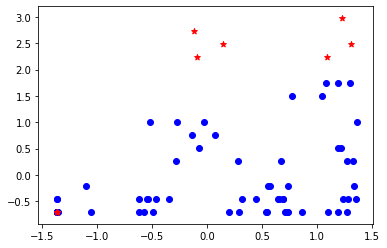

In [115]:
dbscan_workflow(df, features, 1.3, 20)

Length of cluster 0 :  71
Number of outliers :  8


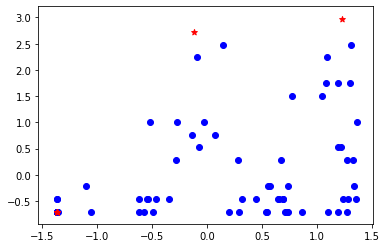

In [116]:
dbscan_workflow(df, features, 1.4, 20)

Length of cluster 0 :  72
Number of outliers :  7


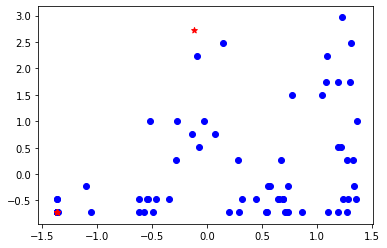

In [117]:
dbscan_workflow(df, features, 1.5, 20)

Length of cluster 0 :  73
Number of outliers :  6


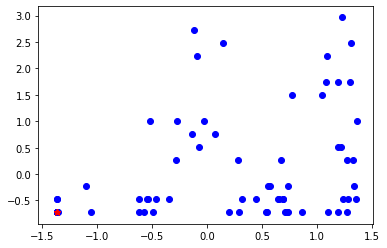

In [118]:
dbscan_workflow(df, features, 1.6, 20)

Length of cluster 0 :  73
Number of outliers :  6


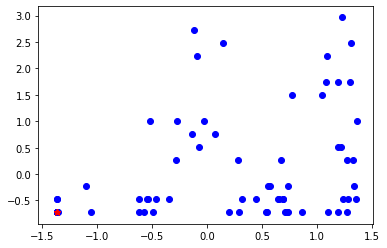

In [119]:
dbscan_workflow(df, features, 1.7, 20)

Length of cluster 0 :  73
Number of outliers :  6


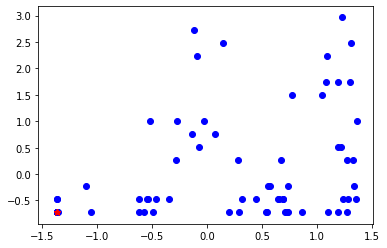

In [120]:
dbscan_workflow(df, features, 1.8, 20)

Length of cluster 0 :  73
Number of outliers :  6


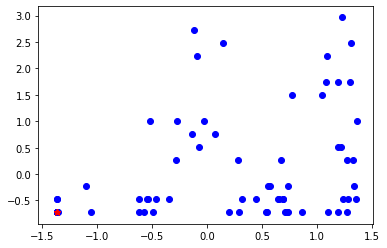

In [121]:
dbscan_workflow(df, features, 1.9, 20)

Length of cluster 0 :  74
Number of outliers :  5


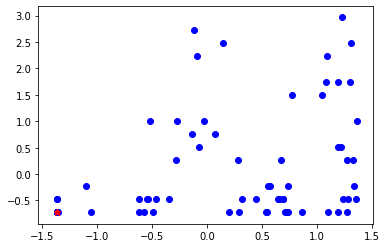

In [122]:
dbscan_workflow(df, features, 2, 20)

Length of cluster 0 :  74
Number of outliers :  5


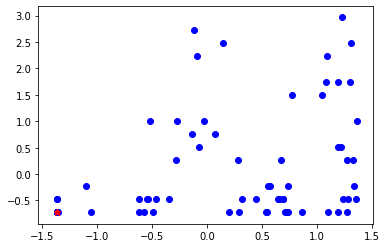

In [123]:
dbscan_workflow(df, features, 2.1, 20)

Length of cluster 0 :  74
Number of outliers :  5


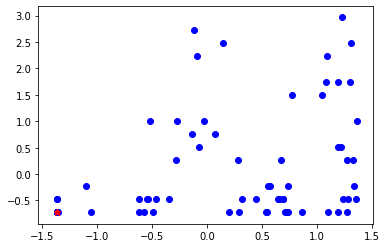

In [124]:
dbscan_workflow(df, features, 2.2, 20)

Length of cluster 0 :  74
Number of outliers :  5


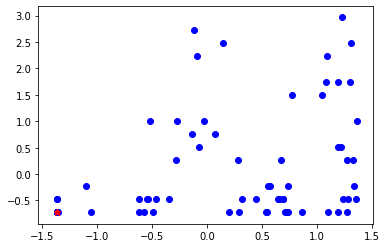

In [125]:
dbscan_workflow(df, features, 2.3, 20)

Length of cluster 0 :  74
Number of outliers :  5


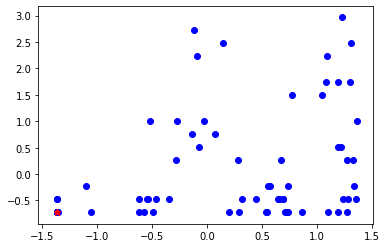

In [126]:
dbscan_workflow(df, features, 2.4, 20)

Length of cluster 0 :  73
Number of outliers :  6


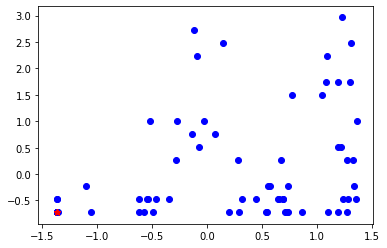

In [127]:
dbscan_workflow(df, features, 1.8, 22)

Length of cluster 0 :  73
Number of outliers :  6


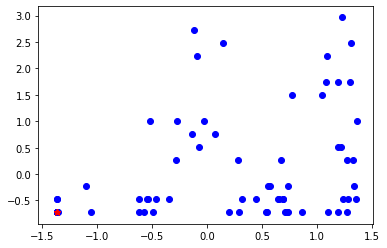

In [128]:
dbscan_workflow(df, features, 1.8, 25)

Length of cluster 0 :  73
Number of outliers :  6


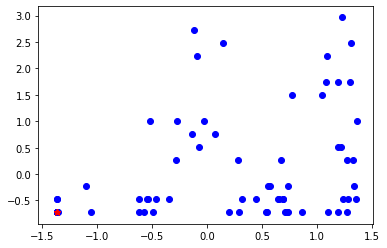

In [129]:
dbscan_workflow(df, features, 1.8, 27)

Length of cluster 0 :  72
Number of outliers :  7


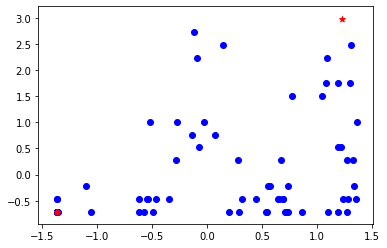

In [130]:
dbscan_workflow(df, features, 1.8, 30)

#### Features 
Flow Duration, <br>
Total Fwd Packet, <br> 
Flow Packets/s

In [132]:
features = ['Flow Duration', 'Total Fwd Packet', 'Flow Packets/s']

Length of cluster 0 :  28
Length of cluster 1 :  24
Number of outliers :  27


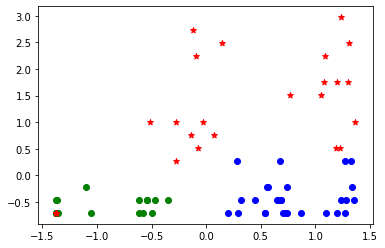

In [133]:
dbscan_workflow(df, features, 0.6, 10)

Length of cluster 0 :  63
Number of outliers :  16


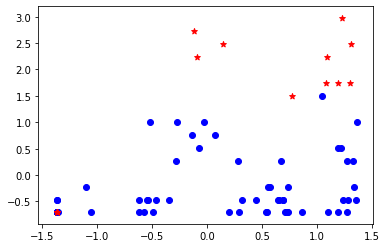

In [134]:
dbscan_workflow(df, features, 1, 15)

Length of cluster 0 :  61
Number of outliers :  18


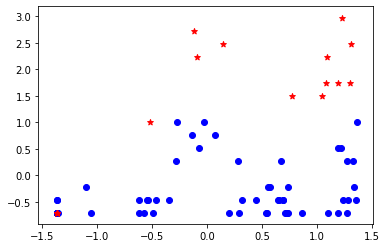

In [135]:
dbscan_workflow(df, features, 1, 20)

Length of cluster 0 :  67
Number of outliers :  12


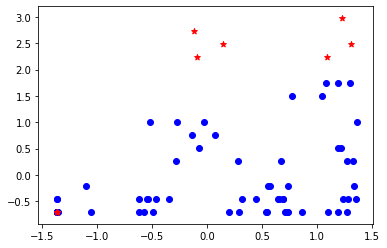

In [136]:
dbscan_workflow(df, features, 1.3, 20)

Length of cluster 0 :  74
Number of outliers :  5


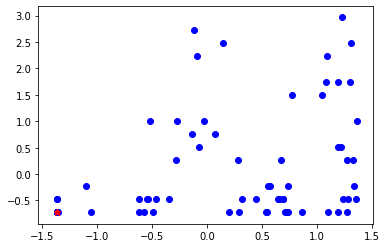

In [137]:
dbscan_workflow(df, features, 2, 20)

#### Features Used
 Flow Duration <br>
 Total Fwd Packet <br>
 Flow IAT Max<br>
 Flow IAT Min

In [139]:
features = ['Flow Duration', 'Total Fwd Packet', 'Flow IAT Max', 'Flow IAT Min']

Length of cluster 0 :  21
Number of outliers :  58


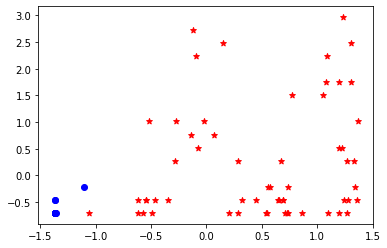

In [140]:
dbscan_workflow(df, features, 0.6, 10)

Length of cluster 0 :  27
Number of outliers :  52


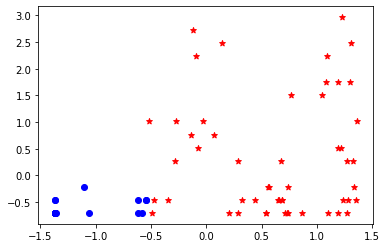

In [141]:
dbscan_workflow(df, features, 1, 15)

Length of cluster 0 :  27
Number of outliers :  52


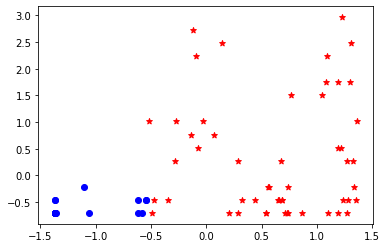

In [142]:
dbscan_workflow(df, features, 1, 20)

Length of cluster 0 :  46
Number of outliers :  33


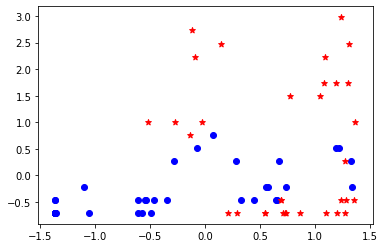

In [143]:
dbscan_workflow(df, features, 1.3, 20)

Length of cluster 0 :  51
Number of outliers :  28


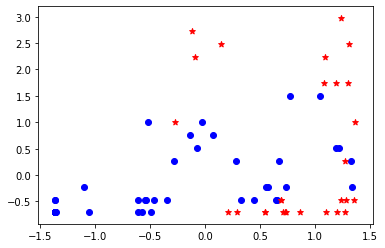

In [144]:
dbscan_workflow(df, features, 1.4, 20)

Length of cluster 0 :  62
Number of outliers :  17


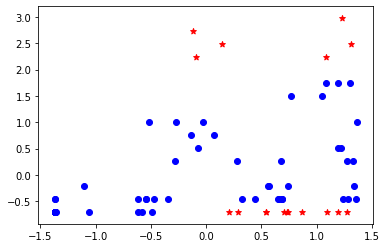

In [145]:
dbscan_workflow(df, features, 1.5, 20)

Length of cluster 0 :  65
Number of outliers :  14


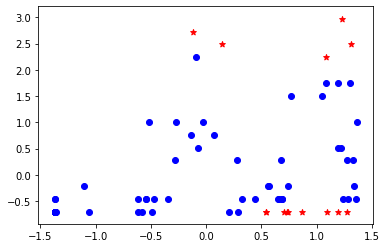

In [146]:
dbscan_workflow(df, features, 1.6, 20)

Length of cluster 0 :  70
Number of outliers :  9


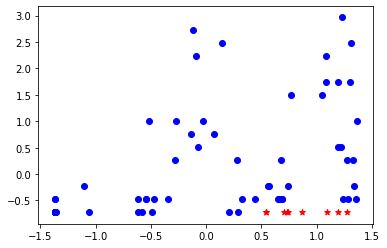

In [147]:
dbscan_workflow(df, features, 1.7, 20)

Length of cluster 0 :  72
Number of outliers :  7


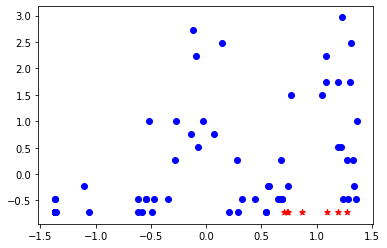

In [148]:
dbscan_workflow(df, features, 1.8, 20)

Length of cluster 0 :  75
Number of outliers :  4


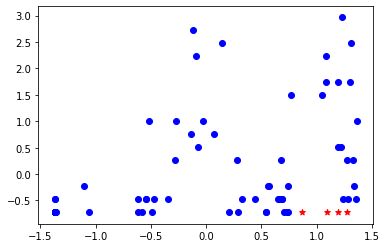

In [149]:
dbscan_workflow(df, features, 1.9, 20)

Length of cluster 0 :  75
Number of outliers :  4


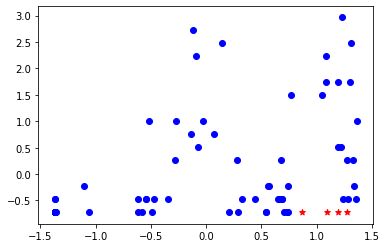

In [150]:
dbscan_workflow(df, features, 2, 20)

Length of cluster 0 :  76
Number of outliers :  3


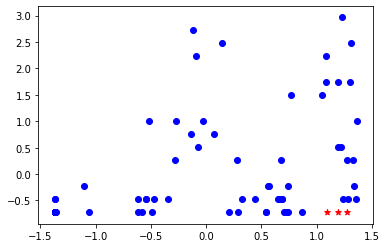

In [151]:
dbscan_workflow(df, features, 2.1, 20)

Length of cluster 0 :  76
Number of outliers :  3


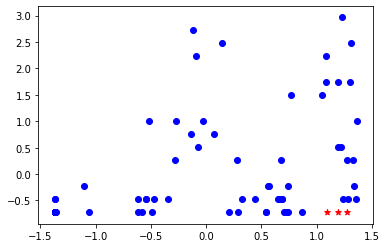

In [152]:
dbscan_workflow(df, features, 2.2, 20)

Length of cluster 0 :  79


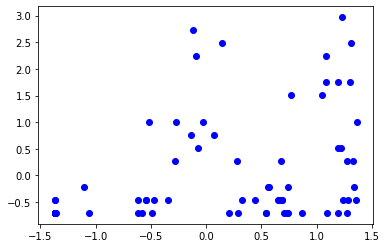

In [153]:
dbscan_workflow(df, features, 2.3, 20)

Length of cluster 0 :  79


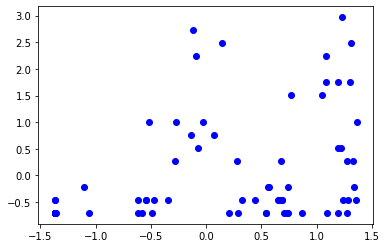

In [154]:
dbscan_workflow(df, features, 2.4, 20)

Length of cluster 0 :  72
Number of outliers :  7


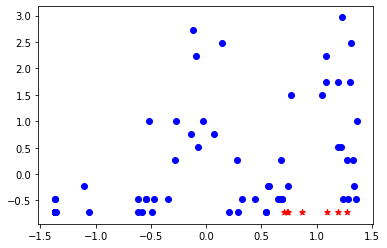

In [155]:
dbscan_workflow(df, features, 1.8, 22)

Length of cluster 0 :  67
Number of outliers :  12


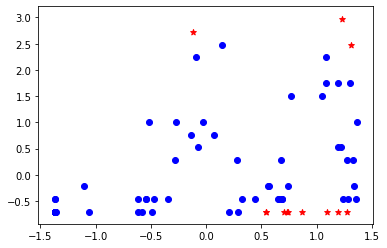

In [156]:
dbscan_workflow(df, features, 1.8, 25)

Length of cluster 0 :  67
Number of outliers :  12


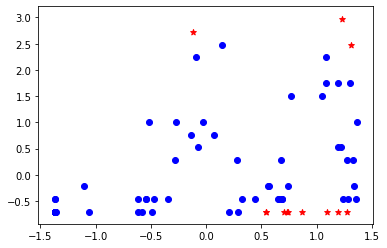

In [157]:
dbscan_workflow(df, features, 1.8, 27)

Length of cluster 0 :  63
Number of outliers :  16


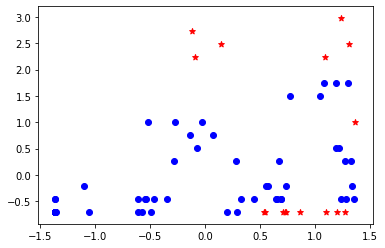

In [158]:
dbscan_workflow(df, features, 1.8, 30)

#### Features Used
 Flow Duration <br> 
 Total Fwd Packet <br>
 Fwd IAT Max <br>
 Fwd IAT Min

In [160]:
features = ['Flow Duration', 'Total Fwd Packet', 'Fwd IAT Max', 'Fwd IAT Min']

Length of cluster 0 :  21
Number of outliers :  58


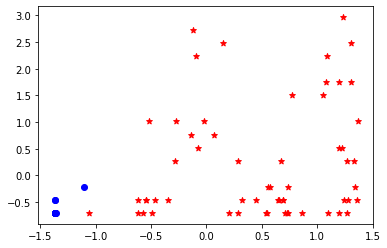

In [161]:
dbscan_workflow(df, features, 0.6, 10)

Length of cluster 0 :  27
Number of outliers :  52


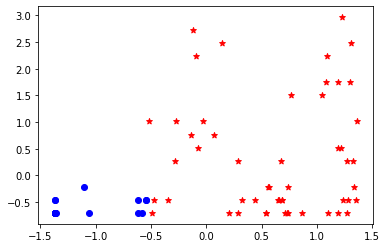

In [162]:
dbscan_workflow(df, features, 1, 15)

Length of cluster 0 :  27
Number of outliers :  52


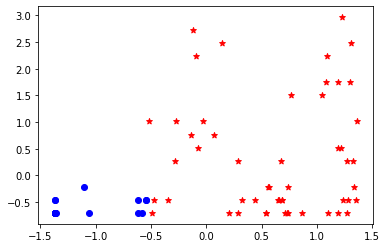

In [163]:
dbscan_workflow(df, features, 1, 20)

Length of cluster 0 :  46
Number of outliers :  33


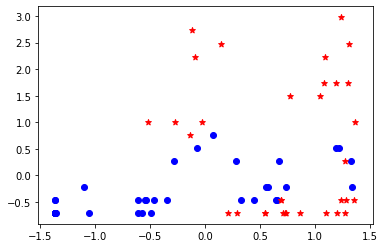

In [164]:
dbscan_workflow(df, features, 1.3, 20)

Length of cluster 0 :  51
Number of outliers :  28


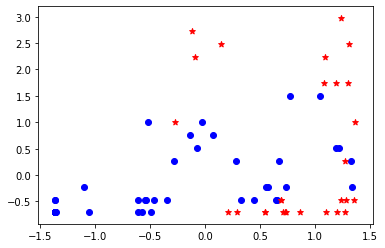

In [165]:
dbscan_workflow(df, features, 1.4, 20)

Length of cluster 0 :  62
Number of outliers :  17


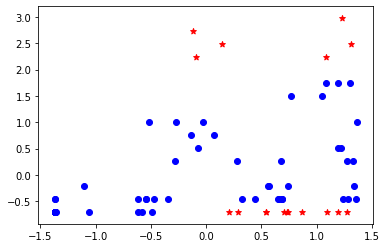

In [166]:
dbscan_workflow(df, features, 1.5, 20)

Length of cluster 0 :  65
Number of outliers :  14


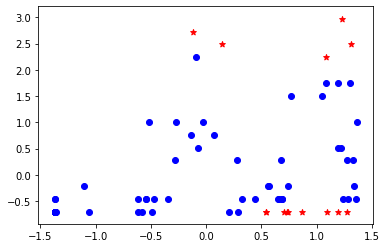

In [167]:
dbscan_workflow(df, features, 1.6, 20)

Length of cluster 0 :  70
Number of outliers :  9


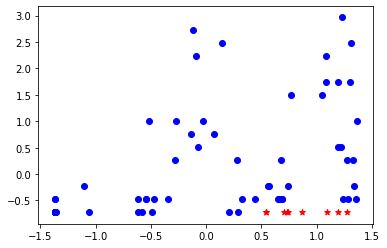

In [168]:
dbscan_workflow(df, features, 1.7, 20)

Length of cluster 0 :  72
Number of outliers :  7


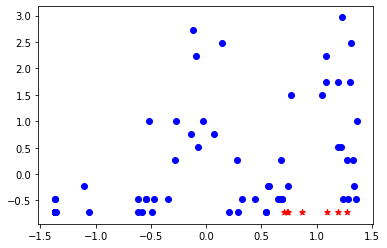

In [169]:
dbscan_workflow(df, features, 1.8, 20)

Length of cluster 0 :  75
Number of outliers :  4


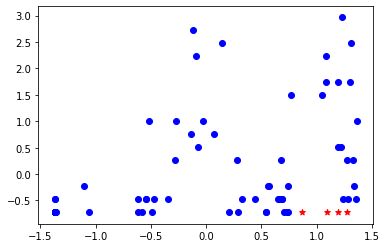

In [170]:
dbscan_workflow(df, features, 1.9, 20)

Length of cluster 0 :  75
Number of outliers :  4


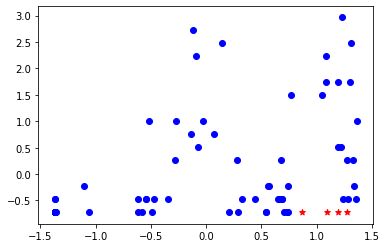

In [171]:
dbscan_workflow(df, features, 2, 20)

Length of cluster 0 :  76
Number of outliers :  3


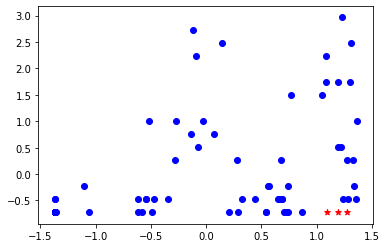

In [172]:
dbscan_workflow(df, features, 2.1, 20)

Length of cluster 0 :  76
Number of outliers :  3


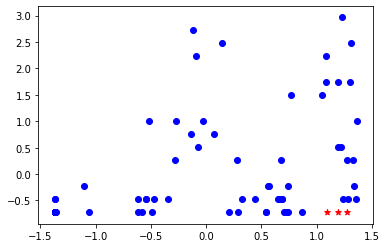

In [174]:
dbscan_workflow(df, features, 2.2, 20)

Length of cluster 0 :  79


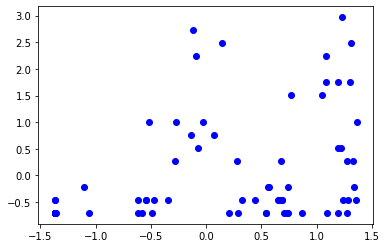

In [175]:
dbscan_workflow(df, features, 2.3, 20)

Length of cluster 0 :  79


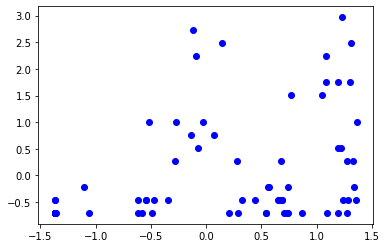

In [176]:
dbscan_workflow(df, features, 2.4, 20)

Length of cluster 0 :  72
Number of outliers :  7


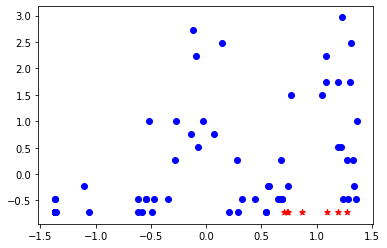

In [177]:
dbscan_workflow(df, features, 1.8, 22)

Length of cluster 0 :  67
Number of outliers :  12


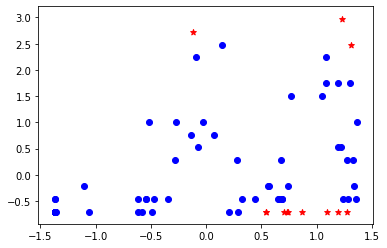

In [178]:
dbscan_workflow(df, features, 1.8, 25)

Length of cluster 0 :  67
Number of outliers :  12


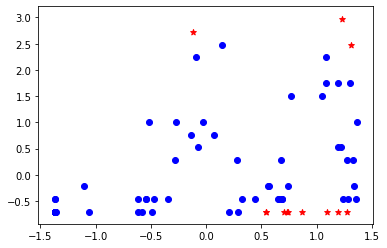

In [179]:
dbscan_workflow(df, features, 1.8, 27)

Length of cluster 0 :  63
Number of outliers :  16


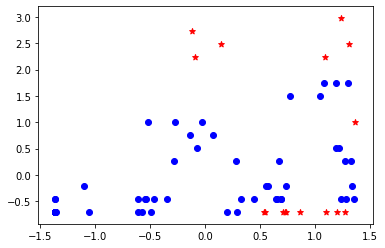

In [180]:
dbscan_workflow(df, features, 1.8, 30)

#### Features Used
 Flow Duration <br>
 Total Fwd Packet <br>
 Idle Max <br>
 Idle Min

In [181]:
features = ['Flow Duration', 'Total Fwd Packet', 'Idle Max', 'Idle Min']

Length of cluster 0 :  22
Length of cluster 1 :  11
Number of outliers :  46


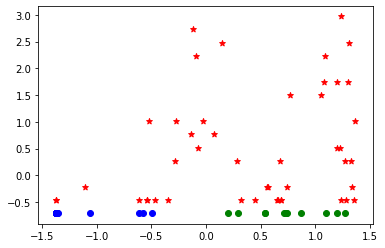

In [182]:
dbscan_workflow(df, features, 0.6, 10)

Length of cluster 0 :  24
Number of outliers :  55


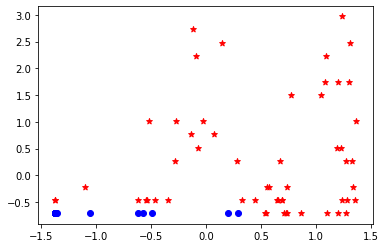

In [183]:
dbscan_workflow(df, features, 1, 15)

Length of cluster 0 :  24
Number of outliers :  55


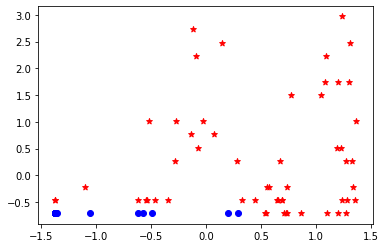

In [184]:
dbscan_workflow(df, features, 1, 20)

Length of cluster 0 :  29
Number of outliers :  50


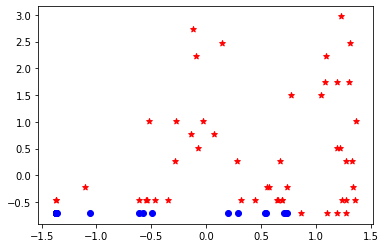

In [185]:
dbscan_workflow(df, features, 1.3, 20)

Length of cluster 0 :  21
Length of cluster 1 :  33
Length of cluster 2 :  20
Number of outliers :  5


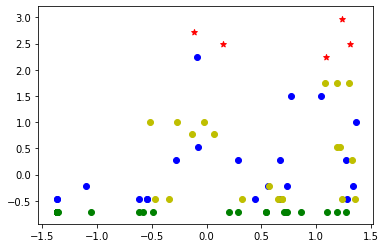

In [188]:
dbscan_workflow(df, features, 1.9, 20)

Length of cluster 0 :  22
Length of cluster 1 :  21
Length of cluster 2 :  33
Number of outliers :  3


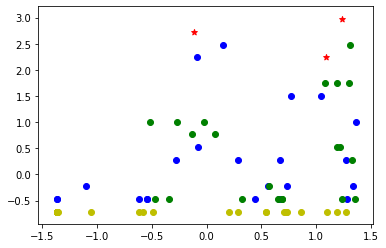

In [186]:
dbscan_workflow(df, features, 2, 20)

Length of cluster 0 :  23
Length of cluster 1 :  54
Number of outliers :  2


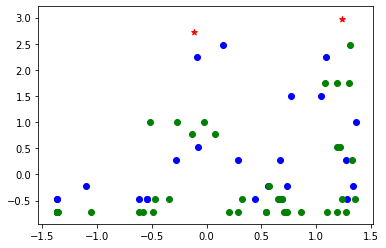

In [187]:
dbscan_workflow(df, features, 2.1, 20)

#### Features Used
 Flow Duration <br> 
 Total Fwd Packet <br>
 Fwd IAT Max <br>
 Fwd IAT Min <br>
 Flow IAT Max <br>
 Flow IAT Min <br>
 Flow Packets/s <br>
 Fwd Packets/s

In [189]:
features = ['Flow Duration', 'Total Fwd Packet', 'Fwd IAT Max', 'Fwd IAT Min', 'Flow IAT Max', 'Flow IAT Min',
           'Flow Packets/s', 'Fwd Packets/s']

Length of cluster 0 :  15
Number of outliers :  64


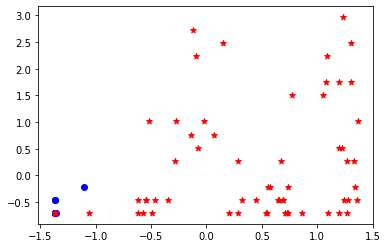

In [190]:
dbscan_workflow(df, features, 0.6, 10)

Length of cluster 0 :  16
Number of outliers :  63


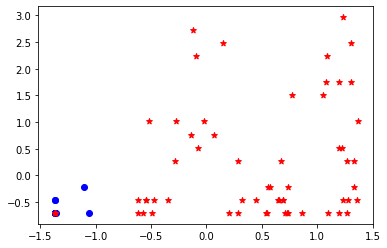

In [191]:
dbscan_workflow(df, features, 1, 15)

Number of outliers :  79


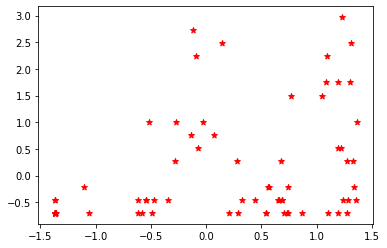

In [192]:
dbscan_workflow(df, features, 1, 20)

Length of cluster 0 :  23
Number of outliers :  56


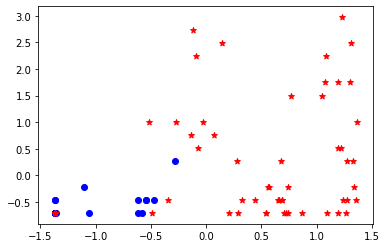

In [193]:
dbscan_workflow(df, features, 1.3, 20)

Length of cluster 0 :  24
Number of outliers :  55


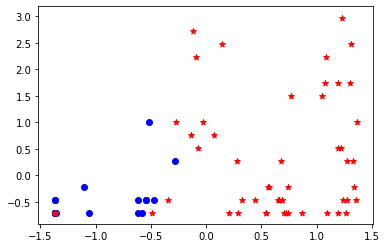

In [196]:
dbscan_workflow(df, features, 1.4, 20)

Length of cluster 0 :  46
Number of outliers :  33


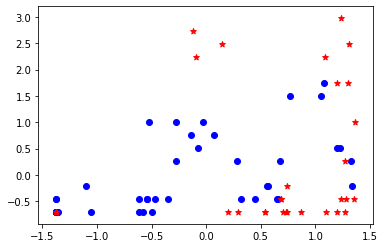

In [197]:
dbscan_workflow(df, features, 1.6, 20)

Length of cluster 0 :  49
Number of outliers :  30


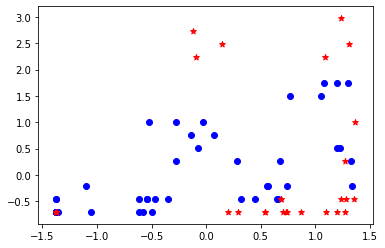

In [198]:
dbscan_workflow(df, features, 1.7, 20)

Length of cluster 0 :  59
Number of outliers :  20


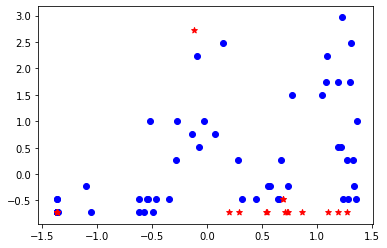

In [209]:
dbscan_workflow(df, features, 1.8, 20)

Length of cluster 0 :  60
Number of outliers :  19


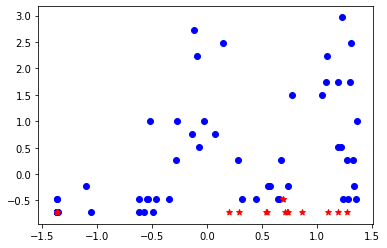

In [199]:
dbscan_workflow(df, features, 1.9, 20)

Length of cluster 0 :  63
Number of outliers :  16


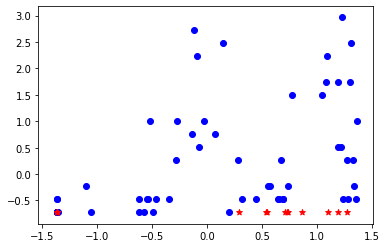

In [200]:
dbscan_workflow(df, features, 2, 20)

Length of cluster 0 :  64
Number of outliers :  15


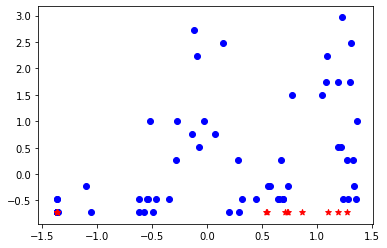

In [201]:
dbscan_workflow(df, features, 2.1, 20)

Length of cluster 0 :  64
Number of outliers :  15


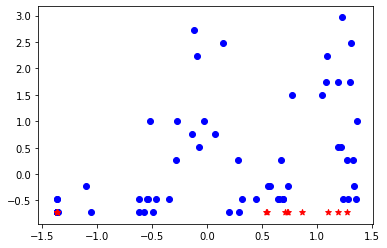

In [202]:
dbscan_workflow(df, features, 2.2, 20)

Length of cluster 0 :  66
Number of outliers :  13


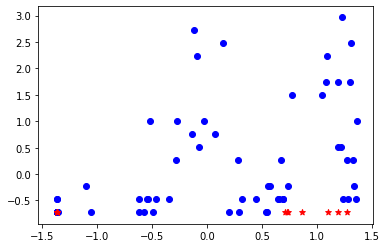

In [203]:
dbscan_workflow(df, features, 2.3, 20)

Length of cluster 0 :  66
Number of outliers :  13


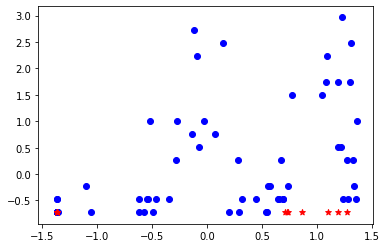

In [204]:
dbscan_workflow(df, features, 2.4, 20)

Length of cluster 0 :  62
Length of cluster 1 :  11
Number of outliers :  6


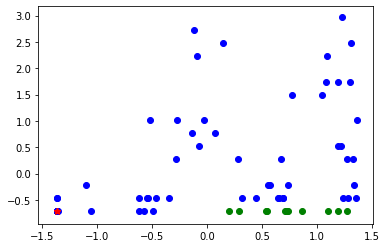

In [212]:
dbscan_workflow(df, features, 1.8, 10)

Length of cluster 0 :  62
Number of outliers :  17


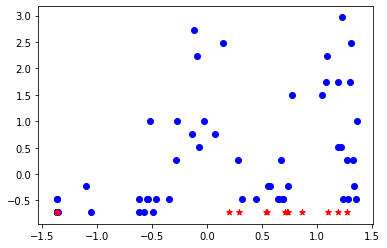

In [211]:
dbscan_workflow(df, features, 1.8, 13)

Length of cluster 0 :  60
Number of outliers :  19


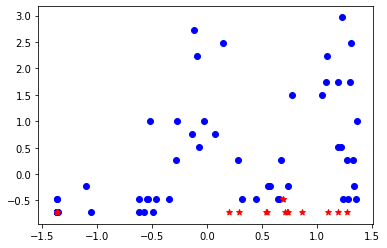

In [210]:
dbscan_workflow(df, features, 1.8, 15)

Length of cluster 0 :  49
Number of outliers :  30


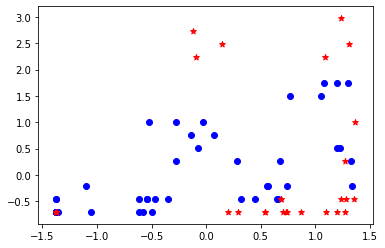

In [205]:
dbscan_workflow(df, features, 1.8, 22)

Length of cluster 0 :  49
Number of outliers :  30


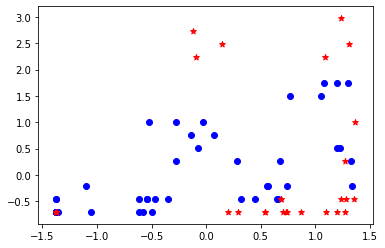

In [206]:
dbscan_workflow(df, features, 1.8, 25)

Length of cluster 0 :  49
Number of outliers :  30


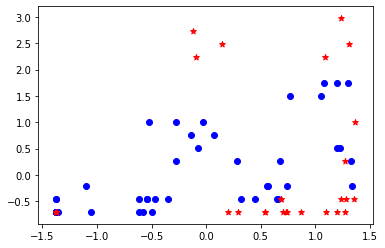

In [207]:
dbscan_workflow(df, features, 1.8, 27)

Length of cluster 0 :  37
Number of outliers :  42


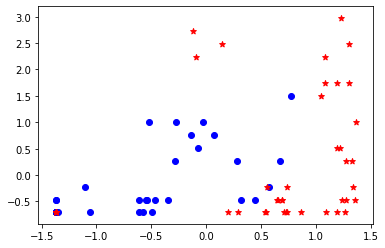

In [208]:
dbscan_workflow(df, features, 1.8, 30)